<span style="font-size: 14px;color:blue"><b>*This project*</b></span> contains comprehensive analysis of crime trends in Vancouver, aiming to uncover insights, predict future crime rates, and compare neighborhood crime patterns. The project leverages Python for data analysis, visualization, and predictive modeling.

**Project Objectives** 

+ *Descriptive Analysis:* Explore historical crime data to observe trends, patterns, and variations in crime occurrences over time. Identify frequently occurring crimes and neighborhoods with high crime rates. Investigate possible seasonality and relationships with holidays.

    
+ *Predictive Modeling*: Utilize linear regression techniques to predict the city's crime rate up to the year 2035. Understand the potential impact of population growth on crime rates and project future changes in crime occurrences.

    
+ *Neighborhood Comparison:* Conduct a detailed comparison of crime rates among different neighborhoods. Uncover spatial variations in crime occurrences and identify factors influencing crime patterns at the neighborhood level.

    
+ *Clustering Analysis:* Apply clustering algorithms to group similar types of crimes or neighborhoods based on specific characteristics. Gain insights into common crime profiles and underlying factors contributing to crime patterns.

**Data Source**
The analysis is based on a comprehensive dataset of Vancouver crime incidents sourced from the Vancouver Police Open Data. This dataset is updated weekly, providing a valuable and up-to-date resource for understanding crime trends and patterns within the city.

<span style="font-size: 22px;color:blue">1.Import Libraries</span>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

<span style="font-size: 22px;color:blue">2.Read datasets</span>

In [2]:
df_population = pd.read_csv('Dataset/VancouverPopulation.csv')
df_holiday =  pd.read_excel('Dataset/CanadaHolidays.xlsx')
df_crime= pd.read_csv('Dataset/crimedata_csv_AllNeighbourhoods_AllYears.csv')



<span style="font-size: 22px;color:blue">3.Quickly explore the data frames </span>

<span style="font-size: 16px;color:blue">Vancouver's Population dataframe</span>

In [29]:
df_population.head()

,growth,growthRate,population,year
0,24300,0.008285,2957471,2035
1,24431,0.008399,2933171,2034
2,24582,0.008523,2908740,2033
3,24751,0.008656,2884158,2032
4,24929,0.008795,2859407,2031


In [30]:
df_population.shape

(86, 4)

In [31]:
df_population.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,27919.790698,0.019731,1.696841e+06,1992.500000
std,13023.268445,0.015569,7.713317e+05,24.969982
min,0.000000,0.000000,5.563690e+05,1950.000000
25%,21071.000000,0.010953,1.087770e+06,1971.250000
50%,25414.500000,0.015066,1.672406e+06,1992.500000
75%,38137.750000,0.018015,2.399014e+06,2013.750000
max,58885.000000,0.073346,2.957471e+06,2035.000000


In [32]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


<span style="font-size: 16px;color:blue">Canada's holiday dataframe</span>

In [33]:
df_holiday.head()

,date,just_date,is_holiday
0,2003-01-01,2003-01-01,1
1,2003-01-02,2003-01-02,0
2,2003-01-03,2003-01-03,0
3,2003-01-04,2003-01-04,0
4,2003-01-05,2003-01-05,0


In [34]:
df_holiday.shape

(8035, 3)

In [35]:
df_holiday.describe()

,is_holiday
count,8035.000000
mean,0.032732
std,0.177945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [36]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8035 non-null   datetime64[ns]
 1   just_date   8035 non-null   datetime64[ns]
 2   is_holiday  8035 non-null   int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 188.4 KB


<span style="font-size: 16px;color:blue">Vancouver's crime dataframe</span>

In [37]:
df_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


In [38]:
df_crime.shape

(869587, 10)

In [39]:
df_crime.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,869587.000000,869587.000000,869587.000000,869587.000000,869587.000000,869514.000000,8.695140e+05
mean,2012.138207,6.487269,15.389062,12.320931,15.837592,449144.535074,4.979392e+06
std,6.108514,3.398929,8.758332,7.462616,18.351731,139101.184542,1.541880e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490186.834000,5.454211e+06
50%,2012.000000,7.000000,15.000000,14.000000,5.000000,491568.089700,5.457165e+06
75%,2018.000000,9.000000,23.000000,18.000000,30.000000,493380.622350,5.458718e+06
max,2023.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


In [40]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869587 entries, 0 to 869586
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           869587 non-null  object 
 1   YEAR           869587 non-null  int64  
 2   MONTH          869587 non-null  int64  
 3   DAY            869587 non-null  int64  
 4   HOUR           869587 non-null  int64  
 5   MINUTE         869587 non-null  int64  
 6   HUNDRED_BLOCK  869575 non-null  object 
 7   NEIGHBOURHOOD  869447 non-null  object 
 8   X              869514 non-null  float64
 9   Y              869514 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 66.3+ MB


<span style="font-size: 12px;color:blue">Change data type </span>

In [ ]:
###### ?????df['column'] = df['column'].astype('|S80') #where the max length is set at 80 bytes,


<span style="font-size: 22px;color:blue">4.Data cleaning </span>

 <span style="font-size: 22px;color:blue">-Finding missing data  </span> 
<br> <span style="font-size: 22px;color:blue">-Dealing with missing data  </span> 

<span style="font-size: 16px;color:blue">Vancouver's crime dataframe - Check missing data (null values) </span>


In [58]:
df_crime.isna().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
dtype: int64

In [42]:
df_crime.TYPE.value_counts(dropna=False)

Theft from Vehicle                                        241178
Other Theft                                               216264
Mischief                                                  105469
Offence Against a Person                                   75763
Break and Enter Residential/Other                          72223
Break and Enter Commercial                                 47360
Theft of Vehicle                                           44735
Theft of Bicycle                                           36951
Vehicle Collision or Pedestrian Struck (with Injury)       28980
Vehicle Collision or Pedestrian Struck (with Fatality)       352
Homicide                                                     312
Name: TYPE, dtype: int64

In [43]:
df_crime.NEIGHBOURHOOD.value_counts(dropna=False)

Central Business District    233815
West End                      78131
Strathcona                    55862
Mount Pleasant                54791
Fairview                      53393
Grandview-Woodland            48833
Renfrew-Collingwood           46547
Kitsilano                     42517
Kensington-Cedar Cottage      41138
Hastings-Sunrise              30013
Sunset                        29147
Marpole                       21790
Riley Park                    20835
Victoria-Fraserview           17438
Killarney                     16457
Oakridge                      13090
Kerrisdale                    11375
Dunbar-Southlands             11344
West Point Grey                9529
Arbutus Ridge                  9337
South Cambie                   8844
Shaughnessy                    8613
Stanley Park                   5606
Musqueam                       1002
NaN                             140
Name: NEIGHBOURHOOD, dtype: int64

In [44]:
#df_crime[df_crime.isna().any(axis=1)]
df_crime[df_crime.isna().any(axis=1)]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0,5453433.0
47360,Break and Enter Residential/Other,2004,5,13,9,0,NaN,Mount Pleasant,492807.0,5457236.0
47361,Break and Enter Residential/Other,2006,6,21,4,0,NaN,Oakridge,491854.0,5452682.0
119629,Homicide,2016,11,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
119894,Homicide,2016,3,10,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
864514,Vehicle Collision or Pedestrian Struck (with I...,2006,1,24,8,4,TERMINAL AVE / QUEBEC ST,NaN,NaN,NaN
864669,Vehicle Collision or Pedestrian Struck (with I...,2004,11,7,3,18,TRANS CANADA HWY / E 1ST AV,NaN,NaN,NaN
864728,Vehicle Collision or Pedestrian Struck (with I...,2006,2,23,16,17,TURNER ST / KAMLOOPS ST,NaN,NaN,NaN
865209,Vehicle Collision or Pedestrian Struck (with I...,2003,10,22,14,50,VICTORIA DR / FINDLAY ST,NaN,NaN,NaN


In [3]:
#df_crime[df_crime["NEIGHBOURHOOD"].isna() &  df_crime["HUNDRED_BLOCK"].isna()]
df_crime.dropna(subset = [ "NEIGHBOURHOOD" , "HUNDRED_BLOCK"], inplace=True)
## Records in which both fielsd are Null 
## df_crime[df_crime["NEIGHBOURHOOD"].isna() &  df_crime["HUNDRED_BLOCK"].isna()]

In [4]:
df_crime[df_crime.isna().any(axis=1)]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y


In [5]:
df_crime.NEIGHBOURHOOD.value_counts(dropna=False)

Central Business District    233814
West End                      78131
Strathcona                    55860
Mount Pleasant                54789
Fairview                      53392
Grandview-Woodland            48833
Renfrew-Collingwood           46547
Kitsilano                     42516
Kensington-Cedar Cottage      41138
Hastings-Sunrise              30013
Sunset                        29147
Marpole                       21790
Riley Park                    20835
Victoria-Fraserview           17437
Killarney                     16457
Oakridge                      13088
Kerrisdale                    11375
Dunbar-Southlands             11344
West Point Grey                9528
Arbutus Ridge                  9336
South Cambie                   8844
Shaughnessy                    8613
Stanley Park                   5606
Musqueam                       1002
Name: NEIGHBOURHOOD, dtype: int64

 <span style="font-size: 22px;color:blue">-Finding Inconsistant texts and typos </span>
 <span style="font-size: 22px;color:blue">-Fixing Inconsistant texts and typos </span>

In [82]:
 df_crime.YEAR.describe()
 # The same way check for all numeric columns - No inconsistencies 
  

count    869435.000000
mean       2012.138707
std           6.108308
min        2003.000000
25%        2006.000000
50%        2012.000000
75%        2018.000000
max        2023.000000
Name: YEAR, dtype: float64

In [83]:
 df_crime.TYPE.value_counts()
 # The same way check for all categorical columns - No inconsistencies 

Theft from Vehicle                                        241176
Other Theft                                               216258
Mischief                                                  105469
Offence Against a Person                                   75721
Break and Enter Residential/Other                          72221
Break and Enter Commercial                                 47359
Theft of Vehicle                                           44734
Theft of Bicycle                                           36951
Vehicle Collision or Pedestrian Struck (with Injury)       28886
Vehicle Collision or Pedestrian Struck (with Fatality)       350
Homicide                                                     310
Name: TYPE, dtype: int64

 <span style="font-size: 22px;color:blue">-Finding Duplicates </span>
 <span style="font-size: 22px;color:blue">-Removing Duplicates  </span>

In [85]:
df_crime[df_crime.duplicated()]
## Duplicate records here might be because of different Aspects of the Same Incident: 
## Sometimes, a single incident might involve multiple offenses or different types of crimes. 
## This could lead to multiple entries with slight variations in other details
## In this specific project, furthur investgation is nor possible, so I assumed that the duplicates
## are because of data entrye error and removed them.

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
225410,Offence Against a Person,2006,6,6,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0.0000,0.000000e+00
225428,Offence Against a Person,2004,11,3,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0.0000,0.000000e+00
225477,Offence Against a Person,2009,9,27,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0.0000,0.000000e+00
225481,Offence Against a Person,2008,9,25,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0.0000,0.000000e+00
225603,Offence Against a Person,2006,1,8,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
301125,Offence Against a Person,2023,6,14,0,0,OFFSET TO PROTECT PRIVACY,Strathcona,0.0000,0.000000e+00
301126,Offence Against a Person,2023,7,10,0,0,OFFSET TO PROTECT PRIVACY,Strathcona,0.0000,0.000000e+00
304288,Other Theft,2017,6,13,23,30,10XX DAVIE ST,West End,490565.3884,5.458520e+06
304289,Other Theft,2017,6,14,0,0,10XX DAVIE ST,West End,490565.3884,5.458520e+06


In [6]:
df_crime.drop_duplicates(inplace=True)

In [7]:
df_crime.duplicated().sum()

0

 <span style="font-size: 22px;color:blue">-Finding  outliers </span> 
<br> <span style="font-size: 22px;color:blue">-Dealing with outliers  </span> 

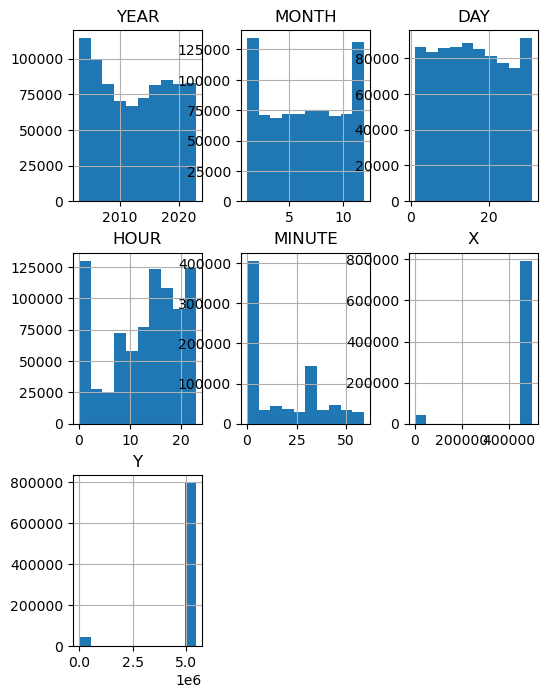

In [9]:
df_crime.hist(figsize=(6,8));

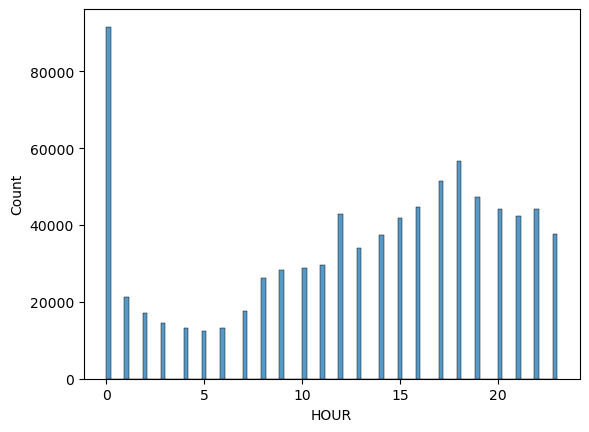

In [10]:
sns.histplot(df_crime.HOUR);

In [14]:
q25,q50,q75 = np.percentile(df_crime.HOUR,(25,50,75))

In [15]:
q25,q50,q75

(8.0, 14.0, 19.0)

In [16]:
iqr = q75 -q25

In [20]:
[hour for HOUR in df_crime.HOUR if (HOUR < q25- 1.5*iqr ) or (HOUR > q75 +1.5 *iqr)]


[]